# MOD 300: Assignment 3

**Basel Abu Sablih, Anders Bygdås and Aleksander Bø**

Date: **Oct 27, 2025**


In [220]:
# Import required packages
%load_ext autoreload
%reload_ext autoreload
%autoreload 2

import dna
import math

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# TOPIC 1: Calculate DNA volume via Monte Carlo simulation.


**Task 0**

We define a simulation box in 3d space by specifying its upper bound. Since we are dealing with DNA, we chose to use nanometer as unit.


In [221]:
box = dna.SimulationBox(20,20,20)

**Task 1**


We create a random point inside the simulation box using uniform distribution.


In [222]:
point = dna.create_random_point(box)

**Task 2**

We use our function for creating an random sphere inside the box.


In [223]:
sphere = dna.create_random_sphere(box)
print(sphere)


SPHERE X: 8.31 Y: 10.37 Z: 7.39 Radius: 6.58


**Task 3**

We have defined an function that checks if a point is inside an sphere. To check that our function actually works, we manually define two points, one that is at the sphere center (inside point) and one that is just outside the radius (outside point)


In [224]:
point_inside = dna.Point(sphere.center.x, sphere.center.y, sphere.center.z)
point_outside = dna.Point(sphere.center.x + sphere.radius + 1, sphere.center.y, sphere.center.z)

assert sphere.is_point_inside(point_inside), "This point should be inside!"
assert not sphere.is_point_inside(point_outside), "The point should be outside!"

print("Function works!")


Function works!


**Task 4**


We estimate the fraction of randomly generated points that are inside a sphere using a Monte Carlo simulation. The simulation generates points uniformly inside the simulation box and counts how many points are contained in the sphere. The fraction is calculated as:

$$
\text{Fraction} = \frac{\text{Number of points inside the sphere}}{\text{Total number of points}}
$$


In [225]:
fraction_estimate = dna.monte_carlo_fraction_inside_sphere(sphere, box, plot=True)

We compare the Monte Carlo estimate of the fraction of points inside the sphere with the theoretical expectation. The expected fraction is calculated as the ratio of the sphere’s volume to the simulation box’s volume:


In [230]:
expected_fraction = sphere.get_volume() / box.get_volume()

print("Expected (volume ratio):", expected_fraction)
print("Monte Carlo result:", fraction_estimate)

Expected (volume ratio): 0.14934905777711258
Monte Carlo result: 0.148


# Task 5


We estimate π by randomly generating points inside a cube and checking how many end up inside a sphere. The sphere is as big as possible so that more random points will end up inside the sphere and it gives better statistical accuracy.


In [231]:
sample_sizes = [10, 100, 1000, 10000, 100000, 1000000]

box = dna.SimulationBox(20, 20, 20)
sphere = dna.Sphere(dna.Point(10, 10, 10), 10)

for sample_size in sample_sizes:
    print(dna.estimate_pi(sample_size, sphere, box))

2.4000000000000004
2.7
3.0540000000000003
3.1026
3.14034
3.143562


# Task 6

Generate 10 random spheres in the simulation box

In [232]:
box = dna.SimulationBox(20, 20, 20)

spheres = [dna.create_random_sphere(box) for _ in range(10)]

for i, sphere in enumerate(spheres, 1): 
    print(f"Sphere {i}: {sphere}")

Sphere 1: SPHERE X: 3.31 Y: 18.65 Z: 15.09 Radius: 0.47
Sphere 2: SPHERE X: 10.66 Y: 10.28 Z: 10.71 Radius: 8.65
Sphere 3: SPHERE X: 13.73 Y: 2.62 Z: 6.59 Radius: 2.14
Sphere 4: SPHERE X: 9.06 Y: 14.99 Z: 13.11 Radius: 2.45
Sphere 5: SPHERE X: 14.28 Y: 7.58 Z: 1.7 Radius: 0.72
Sphere 6: SPHERE X: 10.67 Y: 9.54 Z: 10.29 Radius: 9.32
Sphere 7: SPHERE X: 6.48 Y: 7.56 Z: 13.14 Radius: 4.03
Sphere 8: SPHERE X: 10.0 Y: 10.01 Z: 9.98 Radius: 9.97
Sphere 9: SPHERE X: 5.45 Y: 4.91 Z: 10.6 Radius: 4.06
Sphere 10: SPHERE X: 10.57 Y: 12.45 Z: 9.74 Radius: 6.42


# Task 7

Calculate and plot the fraction of points INSIDE the sphere divided by the number of randomly generated points. 

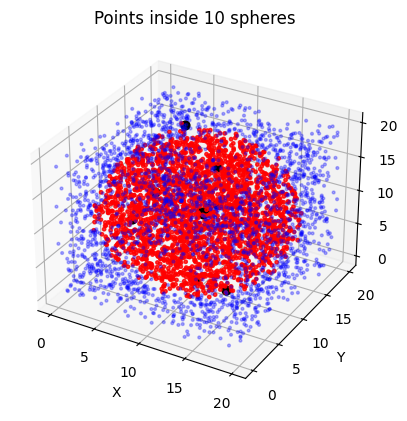

In [237]:
fractions = dna.monte_carlo_fraction_inside_sphere(spheres, box, n_points=100_000, plot=True);

To check if the result is right we compare the Monte Carlo estimate with the theoretical volume ratio, given by the volume of the sphere divided  
by the volume of the box. Since the points are generated uniformly, this ratio represents the expected probability that a random point falls inside the sphere. 

# References

(Estimating Pi using the Monte Carlo Method) https://www.101computing.net/estimating-pi-using-the-monte-carlo-method/
